In [2]:
# Working with the built-in dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [3]:
house_data = fetch_california_housing()
type(house_data)

sklearn.utils._bunch.Bunch

In [4]:
house_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
# convert to df
data = pd.DataFrame(data=np.c_[house_data['data'],
                               house_data['target']],
                              columns=house_data['feature_names']
                               +['target'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [7]:
data.shape

(20640, 9)

In [8]:
# identify X & y variables
X = data.drop('target', axis=1)
y = data['target']

In [9]:
print(f"X attributes => {X.columns}")

X attributes => Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [10]:
print(f"y attributes => {y}")

y attributes => 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, y_train.shape)

(16512, 8) (16512,)


In [13]:
print(X_test.shape, y_test.shape)

(4128, 8) (4128,)


In [14]:
print(X_train[:5])

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  


In [16]:
# standardize input data to fit the model
scaler = StandardScaler()

X_train_scaled_features = scaler.fit_transform(X_train)
X_test_scaled_features = scaler.transform(X_test)

In [17]:
# instantiate model

svr_model = SVR(kernel='rbf', C=10, gamma='auto') 
svr_model

SVR(C=10, gamma='auto')

In [18]:
svr_model.fit(X_train, y_train)

SVR(C=10, gamma='auto')

In [20]:
# train model
svr_model.fit(X_train_scaled_features, y_train)

SVR(C=10, gamma='auto')

In [33]:
# make predictions on unseen data
model_pred = svr_model.predict(X_test_scaled_features)

In [34]:
# evaluate modelto know performance
mse = mean_squared_error(y_test, model_pred)
mae = mean_absolute_error(y_test, model_pred)

In [35]:
print(f"Model MSE => {round(mse, 2)}")
print(f"Model MAE => {round(mae, 2)}")

Model MSE => 0.32
Model MAE => 0.38


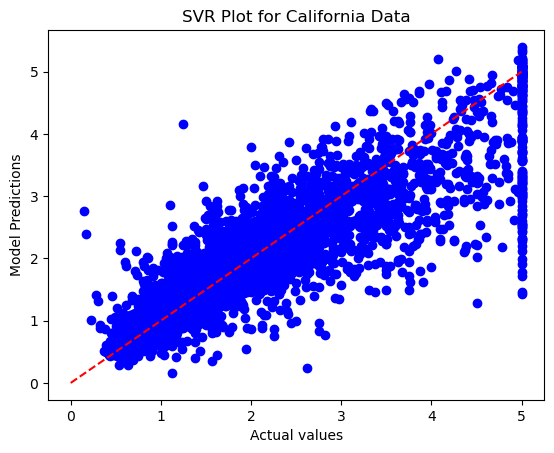

In [36]:
# plot to show the predicted results vs the actual results
plt.scatter(y_test, model_pred,
           color='blue',
           label="Actual values vs predicted values")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', 
         linestyle='--')
plt.xlabel("Actual values")
plt.ylabel("Model Predictions")
plt.title("SVR Plot for California Data")
plt.show()